In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg

from basics import alpha

resultsfilename = "data_stats-outliers-replaced.csv"
st_ = pd.read_csv(resultsfilename)
print("Loading", len(st_), "lines of stats.")

def get_scale(metric):
    """
    Get the right scale for particular metric.
    """
    
    if metric in ["AUC", "Correct"]:
        return (0.6, 1.1)
    elif metric_ == "JoM":
        return (0, 100)
    else:
        return None

Loading 876 lines of stats.


# Comparison of RT, AUC, Correct, and JoM on the two fonts depending on training

For both studies together and lexical task

Designers : comparing RTnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,1132.0,4.740881e-10,0.469,0.643


----> the median is different

Non-designers : comparing RTnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,825.0,1.097290e-09,0.549,0.636


----> the median is different



Designers : comparing AUCnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,1093.0,0.938769,0.034,0.336


----> the median is the same

Non-designers : comparing AUCnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,377.5,0.356582,0.054,0.261


----> the median is the same



Designers : comparing Correctnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,1811.0,0.799295,0.04,0.428


----> the median is the same

Non-designers : comparing Correctnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,607.0,0.014566,0.182,0.435


----> the median is different



Designers : comparing JoM between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,915.0,0.000039,-0.27,0.554


----> the median is different

Non-designers : comparing JoM between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,1055.5,0.073854,-0.055,0.49


----> the median is the same



For study #1 and lexical task

Designers : comparing RTnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,222.0,0.000013,0.497,0.615


----> the median is different

Non-designers : comparing RTnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,196.0,0.000495,0.566,0.618


----> the median is different



Designers : comparing AUCnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,114.0,0.194386,0.145,0.312


----> the median is the same

Non-designers : comparing AUCnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,85.5,0.71642,0.105,0.263


----> the median is the same



Designers : comparing Correctnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,258.5,0.358084,0.134,0.439


----> the median is the same

Non-designers : comparing Correctnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,119.0,0.378039,0.187,0.408


----> the median is the same



Designers : comparing JoM between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,229.5,0.003332,-0.256,0.551


----> the median is different

Non-designers : comparing JoM between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,209.0,0.450057,0.071,0.477


----> the median is the same



For study #2 and lexical task

Designers : comparing RTnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,351.0,0.000007,0.319,0.664


----> the median is different

Non-designers : comparing RTnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,202.0,2.584200e-07,0.479,0.66


----> the median is different



Designers : comparing AUCnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,346.5,0.278702,-0.082,0.404


----> the median is the same

Non-designers : comparing AUCnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,115.5,0.502001,0.004,0.257


----> the median is the same



Designers : comparing Correctnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,538.5,0.244848,-0.116,0.478


----> the median is the same

Non-designers : comparing Correctnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,193.0,0.016631,0.313,0.461


----> the median is different



Designers : comparing JoM between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,239.0,0.004794,-0.259,0.557


----> the median is different

Non-designers : comparing JoM between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,338.0,0.104027,-0.106,0.501


----> the median is the same





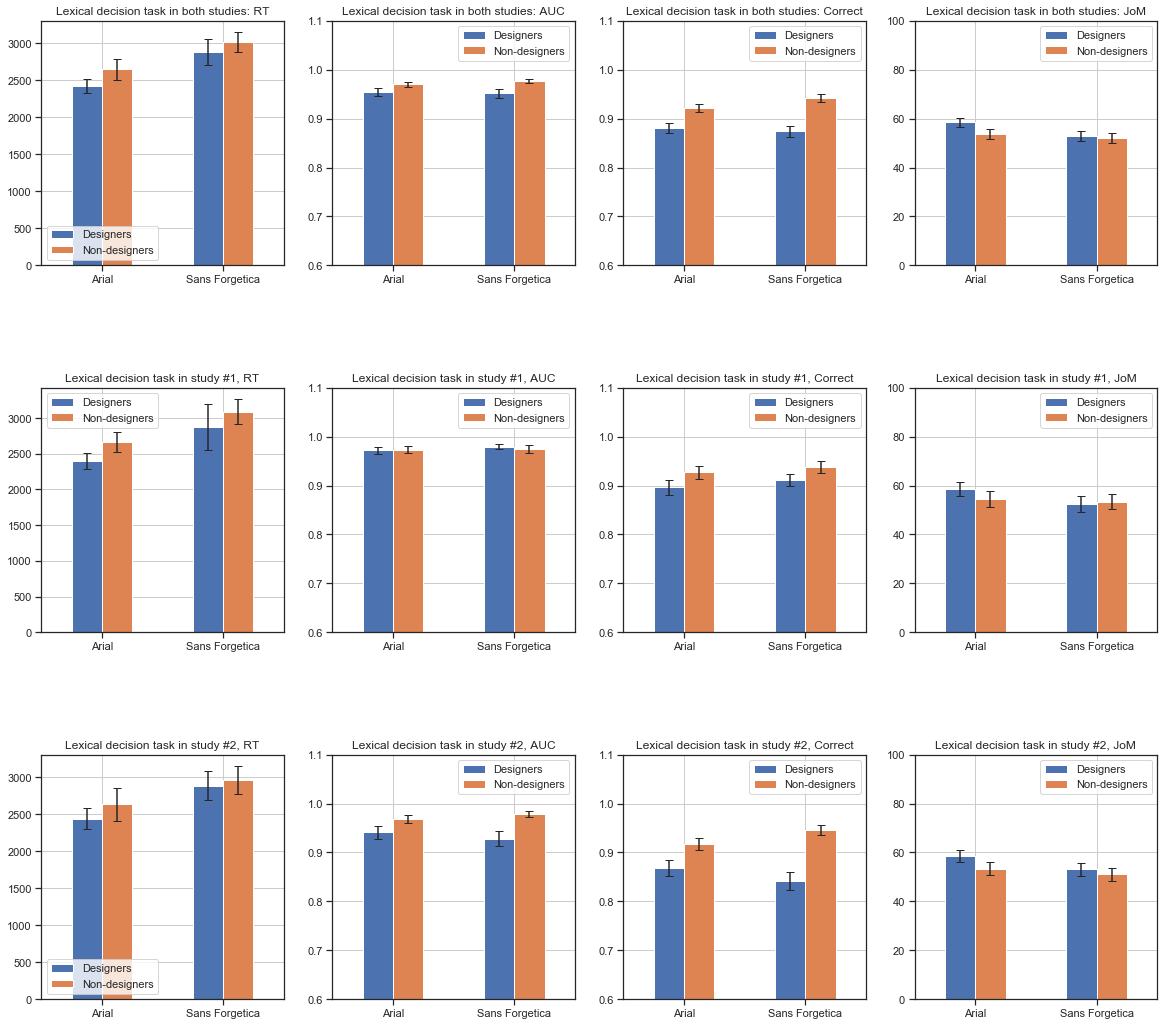

In [10]:
# Comparison of RT, AUC, Correct, and JoM of the two fonts
# depending on the design training

# The Wilcoxon signed-rank test tests the null hypothesis
# that two related paired samples come from the same distribution.
# A continuity correction is applied by default 
# from continuous distributions with equal medians.
# The test assumes that x and y are independent.

# Legend
# RBC: The rank biserial correlation is the difference between
# the proportion of favorable evidence minus the proportion
# of unfavorable evidence (see Kerby 2014).
# CLES: The common language effect size is the probability (from 0 to 1)
# that a randomly selected observation from the first sample will be greater
# than a randomly selected observation from the second sample.

# only for the lexical task
ttype = "lexical"
metrics = ["RTnorm", "AUCnorm", "Correctnorm", "JoM"]

# set up plots
fig, axes = plt.subplots(3, 4, figsize=(20, 18))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

for i, sid in enumerate(["all", 1, 2]):
    if sid == "all":
        st = st_[(st_["Type"] == ttype)]
        print("For both studies together and %s task" % ttype)
        title = "Lexical decision task in both studies: %s"
    else:
        st = st_[(st_["Type"] == ttype) & (st_["StudyID"] == sid)]
        print("For study #%d and %s task" % (sid, ttype))
        title = "Lexical decision task in study #%s, %%s" % sid
    print()

    for j, metric in enumerate(metrics):
        means = pd.DataFrame(columns=["Designers", "Non-designers"], index=["Arial", "Sans Forgetica"])
        errors = pd.DataFrame(columns=["Designers", "Non-designers"], index=["Arial", "Sans Forgetica"])
        for isDesigner in [True, False]:
            designer_ = ["Non-designers", "Designers"][isDesigner]
            print(designer_, ": comparing", metric, "between the two fonts")
            x = st[(st["isDesigner"] == isDesigner) & (st["Font"] == "arial")]
            y = st[(st["isDesigner"] == isDesigner) & (st["Font"] == "sansforgetica")]
            res = pg.wilcoxon(x[metric], y[metric], tail="two-sided")
            display(res)
            if res.loc["Wilcoxon", "p-val"] > alpha:
                print("----> the median is the same")
                print()
            else:
                print("----> the median is different")
                print()
            # plot it using non-normalized metric
            metric_ = metric.replace("norm", "")
            means[designer_]["Arial"] = x[metric_].mean()
            errors[designer_]["Arial"] = x[metric_].sem()
            means[designer_]["Sans Forgetica"] = y[metric_].mean()
            errors[designer_]["Sans Forgetica"] = y[metric_].sem()
        means.plot.bar(yerr=errors,
                       capsize=4,
                       ax=axes[i][j],
                       title=title % metric_,
                       grid=True,
                       ylim=get_scale(metric_),
                       rot=0)
        print()
        print()

# Comparison of AUC for words and non-words depending on training

Comparison of AUC for words depending on training, only in study #2


,U-val,p-val,RBC,CLES
MWU,7260.5,0.746767,0.023,0.42


----> the median is the same

Comparison of AUC for non-words depending on training, only in study #2


,U-val,p-val,RBC,CLES
MWU,5720.0,0.001403,0.231,0.53


----> the median is different





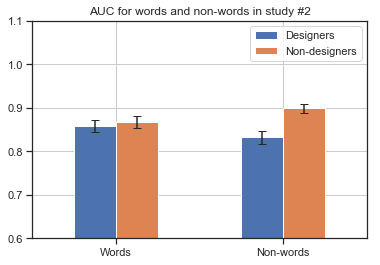

In [17]:
# Comparison of AUC for words and non-words
# depending on the design training
# using MWU

# MWU tests the hypothesis that data in x and y are samples
# from continuous distributions with equal medians.
# The test assumes that x and y are independent.
# This test corrects for ties and by default uses a continuity correction.

# only for study #2
sid = 2
st = st_[st_["StudyID"] == sid]

means = pd.DataFrame(columns=["Designers", "Non-designers"], index=["Words", "Non-words"])
errors = pd.DataFrame(columns=["Designers", "Non-designers"], index=["Words", "Non-words"])
for i, metric in enumerate(["AUCnorm_word", "AUCnorm_nonword"]):
    category = ["Words", "Non-words"][i]
    print("Comparison of AUC for", category.lower(), "depending on training, only in study #2")
    x = st[st["isDesigner"] == True]
    y = st[st["isDesigner"] == False]
    res = pg.mwu(x[metric], y[metric], tail="two-sided")
    display(res)
    if res.loc["MWU", "p-val"] > alpha:
        print("----> the median is the same")
        print()
    else:
        print("----> the median is different")
        print()
    # plot it using non-normalized metric
    metric_ = metric.replace("norm", "")
    means["Designers"][category] = x[metric_].mean()
    errors["Designers"][category] = x[metric_].sem()
    means["Non-designers"][category] = y[metric_].mean()
    errors["Non-designers"][category] = y[metric_].sem()
means.plot.bar(yerr=errors,
               capsize=4,
               grid=True,
               ylim=get_scale("AUC"),
               rot=0,
               title="AUC for words and non-words in study #2")
print()
print()

# Comparison of AUC of designers vs. non-designers on words and non-words

Comparison of AUC for designers between words and non-words, only in study #2


,W-val,p-val,RBC,CLES
Wilcoxon,1794.0,0.097583,-0.06,0.472


----> the median is the same

Comparison of AUC for non-designers between words and non-words, only in study #2


,W-val,p-val,RBC,CLES
Wilcoxon,1405.5,0.030743,0.261,0.448


----> the median is different





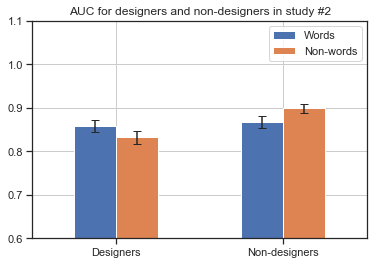

In [22]:
# Comparison of AUC of designers vs. non-designers on words and non-words
# using Wilcoxon

# only for study #2
sid = 2
st = st_[st_["StudyID"] == sid]

means = pd.DataFrame(columns=["Words", "Non-words"], index=["Designers", "Non-designers"])
errors = pd.DataFrame(columns=["Words", "Non-words"], index=["Designers", "Non-designers"])
for isDesigner in [True, False]:
    designer_ = ["Non-designers", "Designers"][isDesigner]
    print("Comparison of AUC for", designer_.lower(), "between words and non-words, only in study #2")
    x = st[st["isDesigner"] == isDesigner]
    res = pg.wilcoxon(x["AUC_word"], x["AUC_nonword"], tail="two-sided")
    display(res)
    if res.loc["Wilcoxon", "p-val"] > alpha:
        print("----> the median is the same")
        print()
    else:
        print("----> the median is different")
        print()
    # plot it using non-normalized metric
    metric_ = metric.replace("norm", "")
    means["Words"][designer_] = x["AUC_word"].mean()
    errors["Words"][designer_] = x["AUC_word"].sem()
    means["Non-words"][designer_] = x["AUC_nonword"].mean()
    errors["Non-words"][designer_] = x["AUC_nonword"].sem()
means.plot.bar(yerr=errors,
               capsize=4,
               grid=True,
               ylim=get_scale("AUC"),
               rot=0,
               title="AUC for designers and non-designers in study #2")
print()
print()

# Comparison of JoM for Arial and SF between designers and non-designers

Comparison of RTnorm between designers and non-designers for arial


,U-val,p-val,RBC,CLES
MWU,18396.0,0.000032,0.23,0.615


----> the median is different

Comparison of RTnorm between designers and non-designers for sansforgetica


,U-val,p-val,RBC,CLES
MWU,18502.0,0.000045,0.226,0.613


----> the median is different

Comparison of AUCnorm between designers and non-designers for arial


,U-val,p-val,RBC,CLES
MWU,21343.5,0.045753,0.107,0.465


----> the median is different

Comparison of AUCnorm between designers and non-designers for sansforgetica


,U-val,p-val,RBC,CLES
MWU,21293.0,0.041524,0.109,0.467


----> the median is different

Comparison of Correctnorm between designers and non-designers for arial


,U-val,p-val,RBC,CLES
MWU,19795.0,0.001774,0.172,0.532


----> the median is different

Comparison of Correctnorm between designers and non-designers for sansforgetica


,U-val,p-val,RBC,CLES
MWU,18435.0,0.000031,0.229,0.559


----> the median is different

Comparison of JoM between designers and non-designers for arial


,U-val,p-val,RBC,CLES
MWU,25991.5,0.11121,-0.088,0.515


----> the median is the same

Comparison of JoM between designers and non-designers for sansforgetica


,U-val,p-val,RBC,CLES
MWU,24718.5,0.532132,-0.034,0.489


----> the median is the same



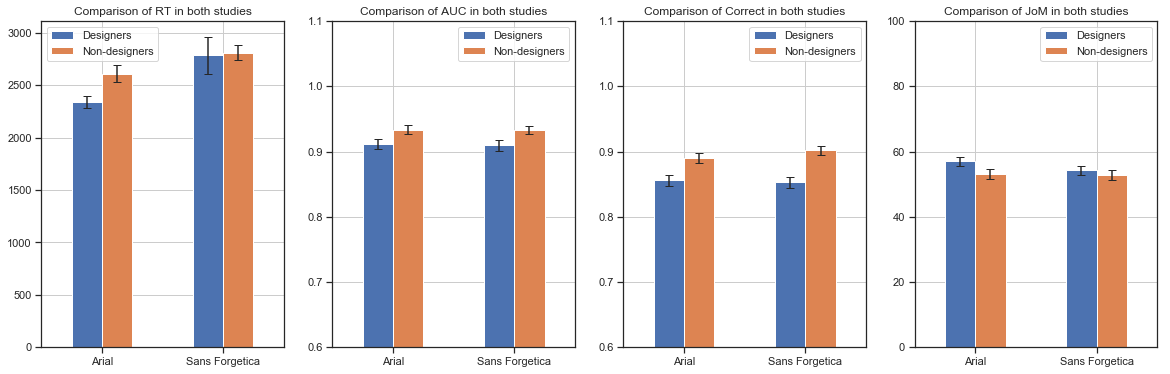

In [20]:
# Comparison of JoM for Arial and SF between designers and non-designers
# using MWU

st = st_
metrics = ["RTnorm", "AUCnorm", "Correctnorm", "JoM"]

# set up plots
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

for i, metric in enumerate(metrics):
    metric_ = metric.replace("norm", "")
    means = pd.DataFrame(columns=["Designers", "Non-designers"], index=["Arial", "Sans Forgetica"])
    errors = pd.DataFrame(columns=["Designers", "Non-designers"], index=["Arial", "Sans Forgetica"])
    for font in ["arial", "sansforgetica"]:
        print("Comparison of", metric, "between designers and non-designers for", font)
        x = st[(st["isDesigner"] == True) & (st["Font"] == font)]
        y = st[(st["isDesigner"] == False) & (st["Font"] == font)]
        res = pg.mwu(x[metric], y[metric], tail="two-sided")
        display(res)
        if res.loc["MWU", "p-val"] > alpha:
            print("----> the median is the same")
            print()
        else:
            print("----> the median is different")
            print()
        # plot it
        font_ = font.title().replace("Sansf", "Sans F")
        means["Designers"][font_] = x[metric_].mean()
        means["Non-designers"][font_] = y[metric_].mean()
        errors["Designers"][font_] = x[metric_].sem()
        errors["Non-designers"][font_] = y[metric_].sem()
    means.plot.bar(yerr=errors,
                   capsize=4,
                   ax=axes[i],
                   grid=True,
                   ylim=get_scale(metric_),
                   rot=0,
                   title="Comparison of %s in both studies" % metric_)

Comparison of JoM for both tasks


,U-val,p-val,RBC,CLES
MWU,12198.0,4.316263e-09,0.346,0.673


----> the median is different

Comparison of JoM for both tasks


,U-val,p-val,RBC,CLES
MWU,25589.0,0.007732,0.139,0.57


----> the median is different

Comparison of RT for both tasks


,U-val,p-val,RBC,CLES
MWU,18126.0,0.612991,0.028,0.404


----> the median is the same

Comparison of RT for both tasks


,U-val,p-val,RBC,CLES
MWU,24511.5,0.000576,0.176,0.516


----> the median is different

Comparison of AUC for both tasks


,U-val,p-val,RBC,CLES
MWU,16234.5,0.025937,0.13,0.501


----> the median is different

Comparison of AUC for both tasks


,U-val,p-val,RBC,CLES
MWU,21913.0,4.207985e-07,0.263,0.583


----> the median is different

Comparison of Correct for both tasks


,U-val,p-val,RBC,CLES
MWU,19374.0,0.512082,-0.038,0.494


----> the median is the same

Comparison of Correct for both tasks


,U-val,p-val,RBC,CLES
MWU,31898.0,0.162741,-0.073,0.507


----> the median is the same




Comparison of JoM for lexical task


,U-val,p-val,RBC,CLES
MWU,3295.0,0.00044,0.294,0.647


----> the median is different

Comparison of JoM for lexical task


,U-val,p-val,RBC,CLES
MWU,6650.0,0.155007,0.105,0.553


----> the median is the same

Comparison of RT for lexical task


,U-val,p-val,RBC,CLES
MWU,4481.0,0.572597,0.039,0.282


----> the median is the same

Comparison of RT for lexical task


,U-val,p-val,RBC,CLES
MWU,5764.0,0.000687,0.225,0.432


----> the median is different

Comparison of AUC for lexical task


,U-val,p-val,RBC,CLES
MWU,3725.0,0.012782,0.201,0.493


----> the median is different

Comparison of AUC for lexical task


,U-val,p-val,RBC,CLES
MWU,4629.5,2.020186e-07,0.377,0.606


----> the median is different

Comparison of Correct for lexical task


,U-val,p-val,RBC,CLES
MWU,4843.5,0.644073,-0.038,0.494


----> the median is the same

Comparison of Correct for lexical task


,U-val,p-val,RBC,CLES
MWU,7974.5,0.324447,-0.073,0.507


----> the median is the same




Comparison of JoM for recognition task


,U-val,p-val,RBC,CLES
MWU,2754.0,9.364422e-07,0.41,0.705


----> the median is different

Comparison of JoM for recognition task


,U-val,p-val,RBC,CLES
MWU,6118.0,0.016956,0.177,0.589


----> the median is different

Comparison of RT for recognition task


,U-val,p-val,RBC,CLES
MWU,4435.5,0.555039,0.049,0.481


----> the median is the same

Comparison of RT for recognition task


,U-val,p-val,RBC,CLES
MWU,6231.5,0.028769,0.162,0.558


----> the median is different

Comparison of AUC for recognition task


,U-val,p-val,RBC,CLES
MWU,4294.5,0.333529,0.079,0.449


----> the median is the same

Comparison of AUC for recognition task


,U-val,p-val,RBC,CLES
MWU,6305.0,0.037604,0.152,0.5


----> the median is different

Comparison of Correct for recognition task


,U-val,p-val,RBC,CLES
MWU,4843.5,0.644073,-0.038,0.494


----> the median is the same

Comparison of Correct for recognition task


,U-val,p-val,RBC,CLES
MWU,7974.5,0.324447,-0.073,0.507


----> the median is the same






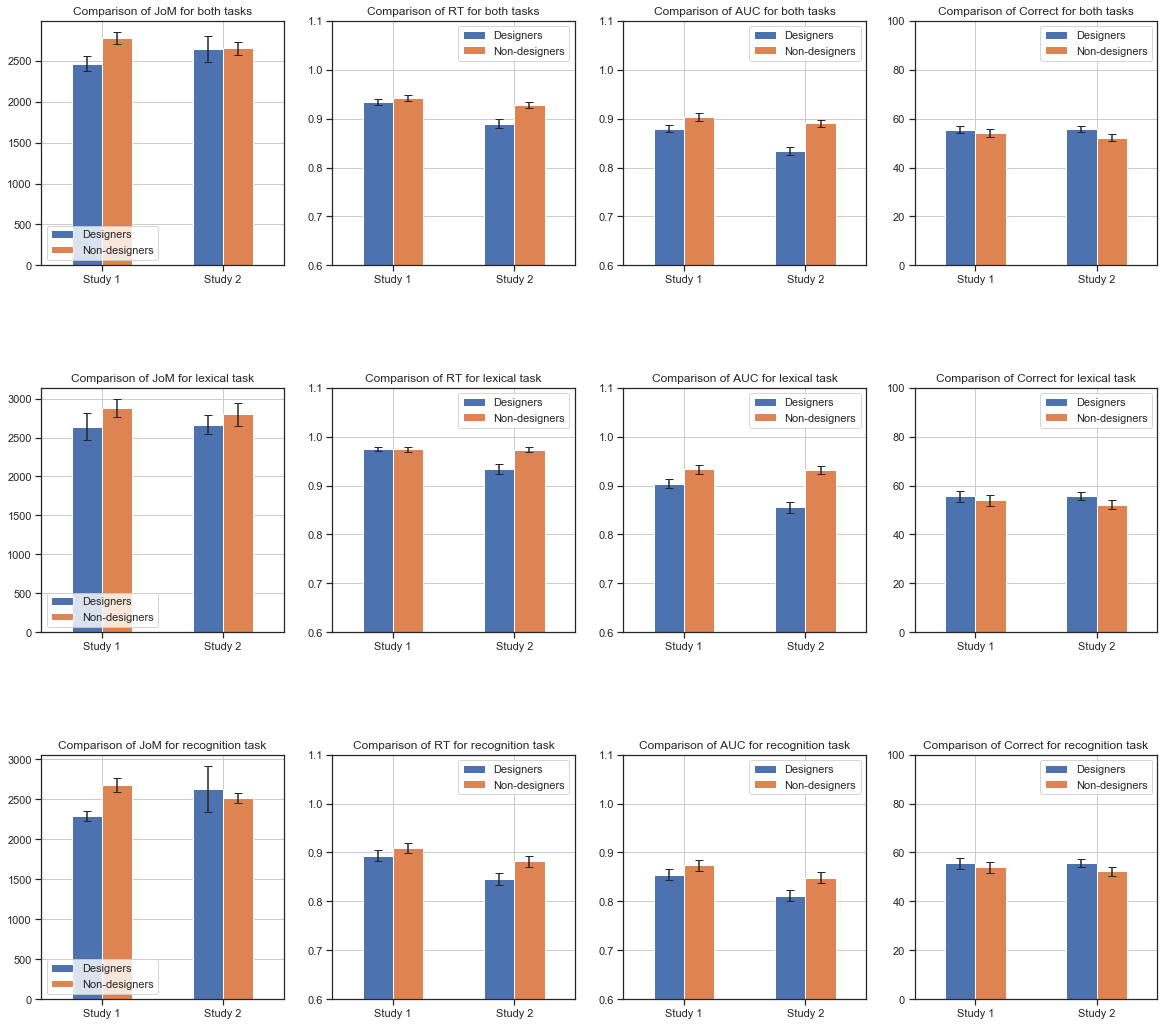

In [32]:
# Comparison of studies #1 and #2

metrics = ["RTnorm", "AUCnorm", "Correctnorm", "JoM"]

# set up plots
fig, axes = plt.subplots(3, 4, figsize=(20, 18))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

for i, ttype in enumerate(["both", "lexical", "recognition"]):
    for j, metric in enumerate(metrics):
        if ttype == "both":
            title = "Comparison of %s for both tasks" % metric_
            st = st_
        else:
            title = "Comparison of %s for %s task" % (metric_, ttype)
            st = st_[st_["Type"] == ttype]
        metric_ = metric.replace("norm", "")
        means = pd.DataFrame(columns=["Designers", "Non-designers"], index=["Study 1", "Study 2"])
        errors = pd.DataFrame(columns=["Designers", "Non-designers"], index=["Study 1", "Study 2"])
        for sid in [1, 2]:
            print(title)
            x = st[(st["isDesigner"] == True) & (st["StudyID"] == sid)]
            y = st[(st["isDesigner"] == False) & (st["StudyID"] == sid)]
            res = pg.mwu(x[metric], y[metric], tail="two-sided")
            display(res)
            if res.loc["MWU", "p-val"] > alpha:
                print("----> the median is the same")
                print()
            else:
                print("----> the median is different")
                print()
            # plot it
            study_ = "Study %s" % sid
            means["Designers"][study_] = x[metric_].mean()
            means["Non-designers"][study_] = y[metric_].mean()
            errors["Designers"][study_] = x[metric_].sem()
            errors["Non-designers"][study_] = y[metric_].sem()
        means.plot.bar(yerr=errors,
                       capsize=4,
                       ax=axes[i][j],
                       grid=True,
                       ylim=get_scale(metric_),
                       rot=0,
                       title=title)
    print()
    print()
    print()